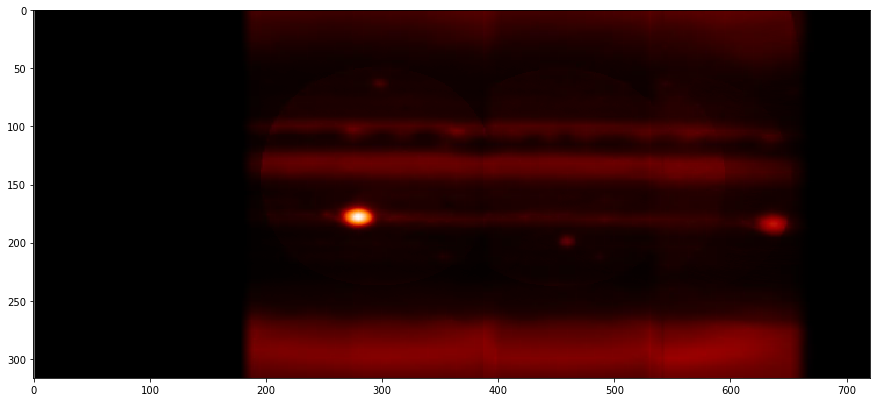

In [94]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(15,12))
plt.imshow(mpimg.imread('imgs/2017may_2.12_lmap.png'))
plt.show()

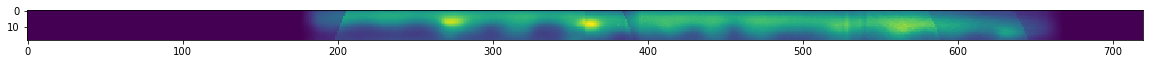

In [1]:
from astropy.io import fits
import numpy as np
data = np.flip(fits.open("fits/2017may_2.12_neb.fits")[0].data, 0)
plt.figure(figsize=(20, 1))
plt.imshow(data)
plt.show()

In [2]:
from copy import deepcopy

def rollingMedian(data, numWindows=10):
    rollingMed = deepcopy(data)
    windowSize = int(len(data)/numWindows)
    for i in range(0, len(data), windowSize):
        if i+windowSize > len(data):
            rollingMed[i:] = np.full(len(data)-i, np.median(data[i:]))
        else:
            rollingMed[i:i+windowSize] = np.full(windowSize, np.median(data[i:i+windowSize]))
    return rollingMed

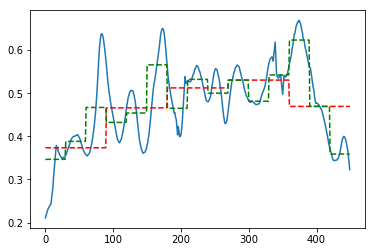

In [41]:
avg = np.mean(data, 0)[190:640]
lon = np.arange(len(avg))
plt.plot(lon, avg)
plt.plot(lon, rollingMedian(avg, numWindows=5), color='red', linestyle='--')
plt.plot(lon, rollingMedian(avg, numWindows=15), color='green', linestyle='--')
plt.show()

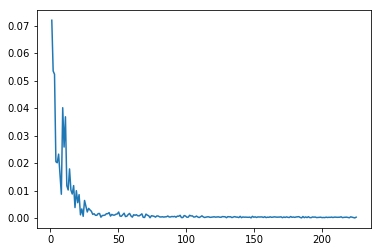

In [106]:
#(Non-detrended data)

N = len(avg_detrended)
T = 1.0/N
x = np.linspace(0.0, N * T, N)
fourier = fft(avg)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf[1:], 2.0/N * np.abs(fourier[1:N//2]))
plt.show()

In [112]:
#wave power in descending order
np.flip(np.argsort(fourier[0:N//2]))[:10]

array([ 0, 11,  5,  6,  8, 10, 16, 28, 26, 23], dtype=int64)

In [111]:
#wave powers corrected for observation width
720 / N * np.flip(np.argsort(fourier[0:N//2]))[:10]

array([ 0. , 17.6,  8. ,  9.6, 12.8, 16. , 25.6, 44.8, 41.6, 36.8])

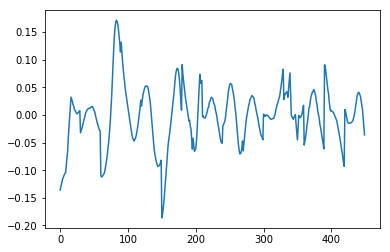

In [42]:
avg_detrended = avg-rollingMedian(avg, numWindows=15)
plt.plot(lon, avg_detrended)
plt.show()

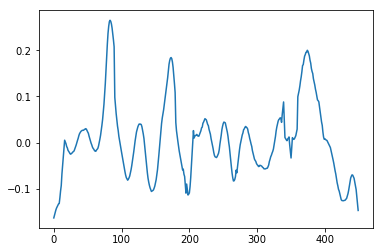

In [80]:
avg_detrended = avg-rollingMedian(avg, numWindows=5)
avg_detrended -= np.median(avg_detrended)
plt.plot(lon, avg_detrended)
plt.show()

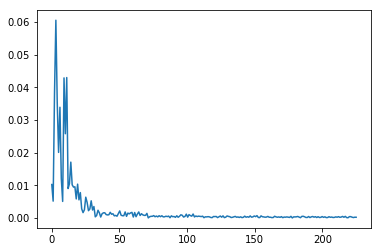

In [103]:
from scipy import fft
N = len(avg_detrended)
T = 1.0/N
x = np.linspace(0.0, N * T, N)
fourier_detrended = fft(avg_detrended)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(fourier_detrended[0:N//2]))
plt.show()

In [110]:
#wave power in descending order
np.flip(np.argsort(fourier_detrended[0:N//2]))[:10]

array([11,  6,  5,  0, 16, 10,  8, 26, 21, 31], dtype=int64)

In [109]:
#wave powers corrected for observation width
720 / N * np.flip(np.argsort(fourier_detrended[0:N//2]))[:10]

array([17.6,  9.6,  8. ,  0. , 25.6, 16. , 12.8, 41.6, 33.6, 49.6])